<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/People-Analytics---Turnover/blob/main/People_Analytics_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Em desenvolvimento

# Analise de People Analytics

``
O objetivo deste projeto é realizar uma análise do turnover dos colaboradores da Empresa X e compreender quais áreas de atuação que podem ser exploradas para mitigar o impacto dessa variável na empresa. Inicialmente, nosso foco será uma abordagem descritiva, buscando entender os padrões e tendências de rotatividade dentro da organização. Ao longo do projeto, planejamos propor análises prescritivas, oferecendo recomendações acionáveis ​​para reduzir o impacto do faturamento. Embora não estejamos realizando uma análise financeira direta neste estágio, nossa meta é fornecer insights valiosos que podem ser aplicados estrategicamente para melhorar a retenção de talentos e a estabilidade organizacional.
``



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from google.colab import files


In [2]:
# Carregando o arquivo Excel em um DataFrame do pandas
caminho_arquivo = '/Base de colaboradores 2.xlsx'
dados = pd.read_excel('/Base de colaboradores 2.xlsx')

In [3]:
dados.head()

,Data Admissão,Tempo de Empresa,Sexo,Sexo_num,Escolaridade,Escolaridade_num,Estado Civil,Estado_Civil_num,Deficiente,Deficiente_num,Data de Nasc,IDADE,Atingimento BSC,Quantidade de Faltas,Quantidade de Atrasos,Quantidade de Atestados,Dias,Situacao,Data Desl/Cessão
0,2016-09-12,6.309589,Feminino,0,Ensino Médio Completo,0.0,Solteiro,1,Não,1,1996-12-02,27.383562,0.41,2,1,7,2303,0,2023-01-02
1,2017-09-11,5.312329,Feminino,0,Ensino Médio Completo,0.0,Solteiro,1,Sim,0,1997-11-24,26.405479,0.05,3,6,0,1939,0,2023-01-02
2,2017-12-04,5.115068,Feminino,0,Ensino Médio Completo,0.0,Solteiro,1,Não,1,1999-05-25,24.906849,0.38,3,7,2,1867,0,2023-01-14
3,2022-11-11,0.142466,Feminino,0,Ensino Médio Completo,0.0,Casado,5,Não,1,1986-08-13,37.695890,0.74,2,1,3,52,0,2023-01-02
4,2020-08-03,2.454795,Feminino,0,Ensino Médio Completo,0.0,Solteiro,1,Não,1,1991-01-07,33.290411,0.01,0,1,2,896,0,2023-01-16


In [4]:
# Filtrando os dados removendo as categorias específicas da Escolaridade
dados_filtrados = dados[~dados['Escolaridade'].isin(['Ensino Médio Incompleto', 'Ensino Fundamental Completo'])]



In [5]:
import warnings
warnings.filterwarnings("ignore", message="Passing `palette` without assigning `hue` is deprecated")


In [6]:
# @title Nome das Variaveis
nomes_variaveis = dados.columns.tolist()
print("\n".join(nomes_variaveis))


Data Admissão
Tempo de Empresa
Sexo
Sexo_num
Escolaridade
Escolaridade_num
Estado Civil
Estado_Civil_num
Deficiente
Deficiente_num
Data de Nasc
IDADE
Atingimento BSC
Quantidade de Faltas
Quantidade de Atrasos
Quantidade de Atestados
Dias
Situacao
Data Desl/Cessão


#Análise Descritiva

Vamos trabalhar nesse primeira etapa com uma análise descritiva dos dados.

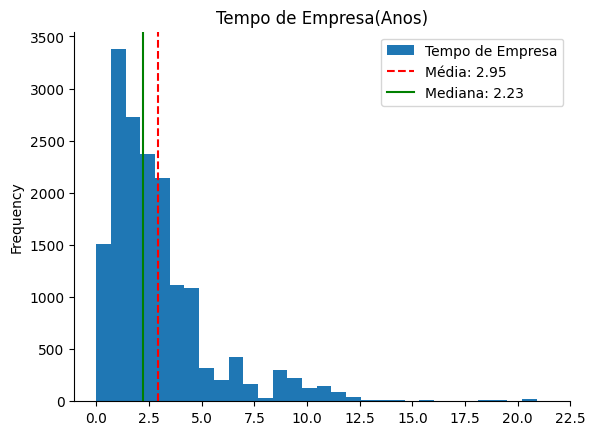

In [7]:
# @title Histograma Tempo de Empresa

# Calculando a média e mediana
media = dados['Tempo de Empresa'].mean()
mediana = dados['Tempo de Empresa'].median()

# Plotando o histograma com a média e a mediana
dados['Tempo de Empresa'].plot(kind='hist', bins=30, title='Tempo de Empresa(Anos)')

# Adicionando a linha vertical para a média e a mediana
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f}')
plt.legend()

# Definindo os ticks do eixo x com incrementos de 2.5
plt.xticks(np.arange(0, dados['Tempo de Empresa'].max() + 2.5, 2.5))

# Removendo as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


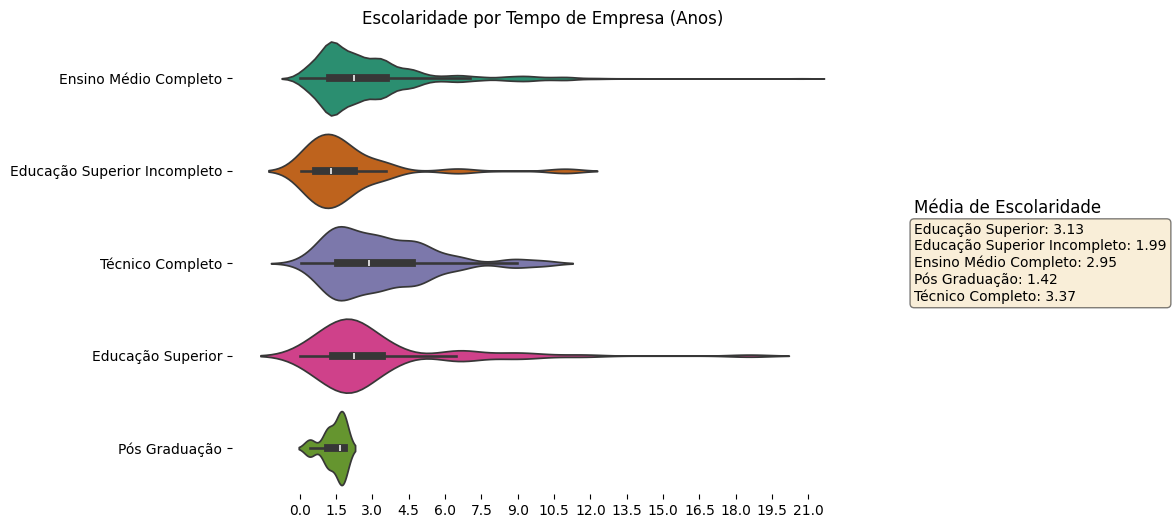

In [8]:
# @title Grafico de Tempo de Empresa por Escolaridade - ViolinPlot

# Calculando as médias para cada categoria de escolaridade
medias_por_escolaridade = dados_filtrados.groupby('Escolaridade')['Tempo de Empresa'].mean()

# Definindo o tamanho da figura
figsize = (8, 6)  # Largura x Altura em polegadas


# Plotando um gráfico com as modificações e adicionando um título
fig, ax = plt.subplots(figsize=figsize)
sns.violinplot(data=dados_filtrados, x='Tempo de Empresa', y='Escolaridade', hue='Escolaridade', inner='box', palette='Dark2', ax=ax, legend=False)
plt.title('Escolaridade por Tempo de Empresa (Anos)')

# Adicionando a caixa de texto com as médias ao lado do gráfico
textstr = '\n'.join(f'{escolaridade}: {media:.2f}' for escolaridade, media in medias_por_escolaridade.items())
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.1, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=props)

# Adicionando um título à caixa de texto das médias
ax.text(1.1, 0.6, 'Média de Escolaridade', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

# Removendo o título do eixo y
ax.set_ylabel('')

# Removendo o título do eixo x
ax.set_xlabel('')

# Definindo os ticks do eixo x com incrementos de 1.5
plt.xticks(np.arange(0, dados_filtrados['Tempo de Empresa'].max() + 1.5, 1.5))

sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()


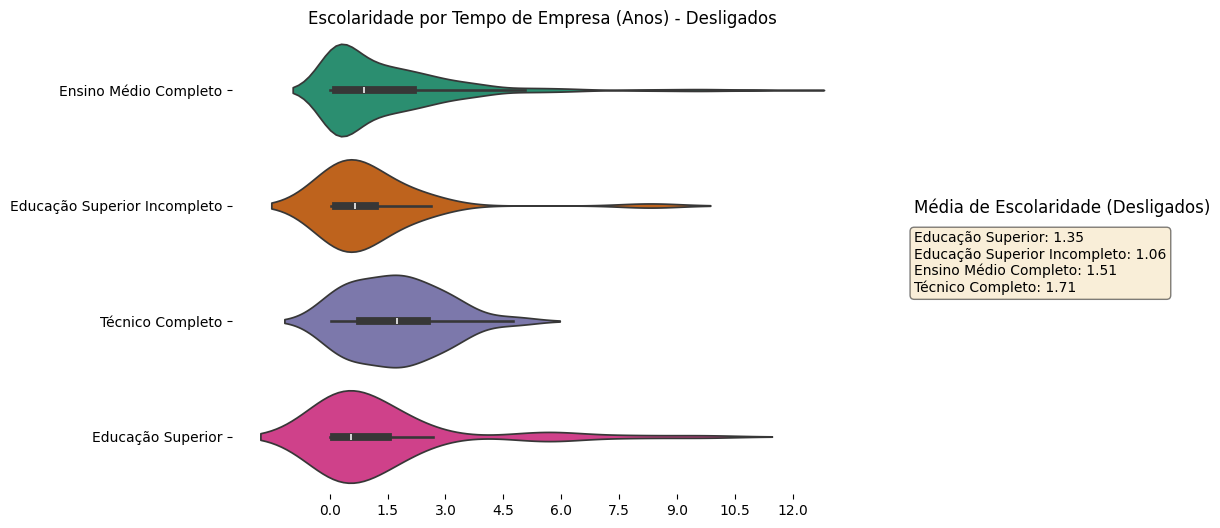

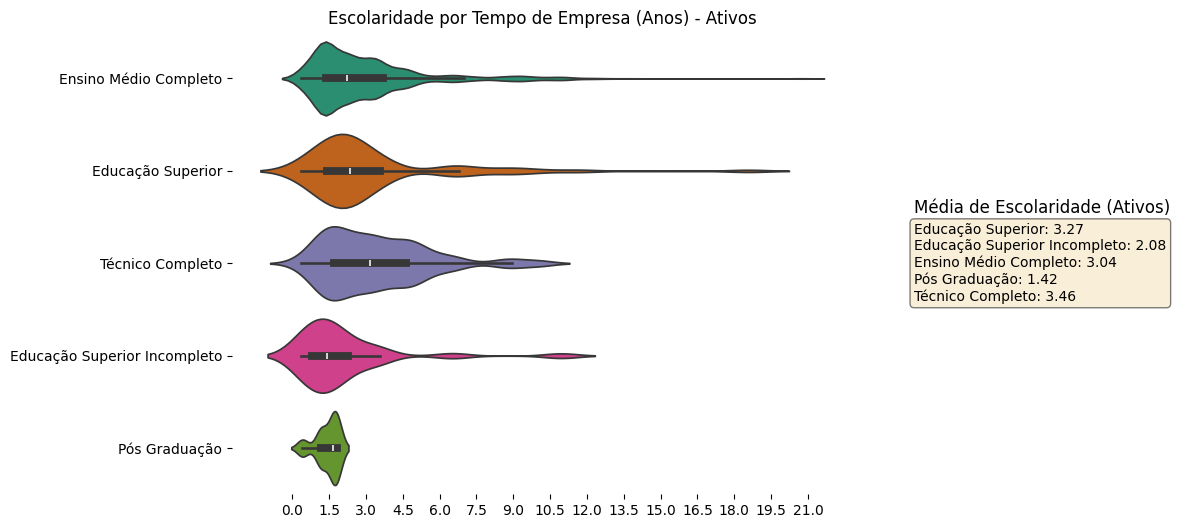

In [9]:
# @title Grafico de Tempo de Empresa por Escolaridade - ViolinPlot - Ativos e Desoligados

# Filtrando os dados para Situacao igual a 0

dados_situacao_0 = dados_filtrados[dados_filtrados['Situacao'] == 0]

# Calculando as médias para cada categoria de escolaridade (Situação 0)
medias_por_escolaridade_situacao_0 = dados_situacao_0.groupby('Escolaridade')['Tempo de Empresa'].mean()

# Plotando o gráfico para Situação 0
fig, ax = plt.subplots(figsize=figsize)
sns.violinplot(data=dados_situacao_0, x='Tempo de Empresa', y='Escolaridade', hue='Escolaridade', inner='box', palette='Dark2', ax=ax, legend=False)
plt.title('Escolaridade por Tempo de Empresa (Anos) - Desligados')

# Adicionando a caixa de texto com as médias ao lado do gráfico (Situação 0)
textstr_situacao_0 = '\n'.join(f'{escolaridade}: {media:.2f}' for escolaridade, media in medias_por_escolaridade_situacao_0.items())
ax.text(1.1, 0.5, textstr_situacao_0, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=props)

# Adicionando um título à caixa de texto das médias (Situação 0)
ax.text(1.1, 0.6, 'Média de Escolaridade (Desligados)', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

# Removendo o título do eixo y (Situação 0)
ax.set_ylabel('')

# Removendo o título do eixo x (Situação 0)
ax.set_xlabel('')

# Definindo os ticks do eixo x com incrementos de 1.5 (Situação 0)
plt.xticks(np.arange(0, dados_situacao_0['Tempo de Empresa'].max() + 1.5, 1.5))


sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

# Filtrando os dados para Situacao igual a 1
dados_situacao_1 = dados_filtrados[dados_filtrados['Situacao'] == 1]

# Calculando as médias para cada categoria de escolaridade (Situação 1)
medias_por_escolaridade_situacao_1 = dados_situacao_1.groupby('Escolaridade')['Tempo de Empresa'].mean()

# Plotando o gráfico para Situação 1
fig, ax = plt.subplots(figsize=figsize)
sns.violinplot(data=dados_situacao_1, x='Tempo de Empresa', y='Escolaridade', hue='Escolaridade', inner='box', palette='Dark2', ax=ax, legend=False)
plt.title('Escolaridade por Tempo de Empresa (Anos) - Ativos')

# Adicionando a caixa de texto com as médias ao lado do gráfico (Situação 1)
textstr_situacao_1 = '\n'.join(f'{escolaridade}: {media:.2f}' for escolaridade, media in medias_por_escolaridade_situacao_1.items())
ax.text(1.1, 0.5, textstr_situacao_1, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=props)

# Adicionando um título à caixa de texto das médias (Situação 1)
ax.text(1.1, 0.6, 'Média de Escolaridade (Ativos)', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

# Removendo o título do eixo y (Situação 1)
ax.set_ylabel('')

# Definindo os ticks do eixo x com incrementos de 1.5 (Situação 1)
plt.xticks(np.arange(0, dados_situacao_1['Tempo de Empresa'].max() + 1.5, 1.5))

# Removendo o título do e
ax.set_xlabel('')

sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()



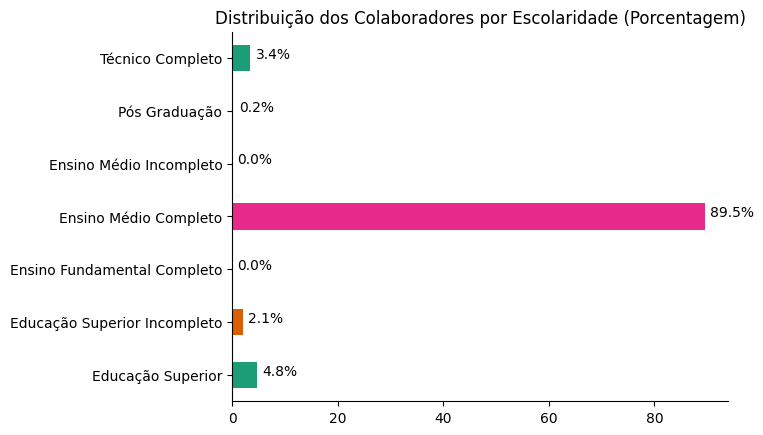

In [17]:
# @title Escolaridade

# Calculando as porcentagens de cada nível de escolaridade
porcentagens_escolaridade = dados.groupby('Escolaridade').size() / len(dados) * 100

# Plotando o gráfico de barras
ax = porcentagens_escolaridade.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Removendo o título do eixo y
plt.gca().set_ylabel('')

# Adicionando texto com as porcentagens ao lado de cada barra
for i, v in enumerate(porcentagens_escolaridade):
    ax.text(v + 1, i, f'{v:.1f}%', color='black')

# Configurando o título do gráfico
plt.title('Distribuição dos Colaboradores por Escolaridade (Porcentagem)')

# Removendo as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


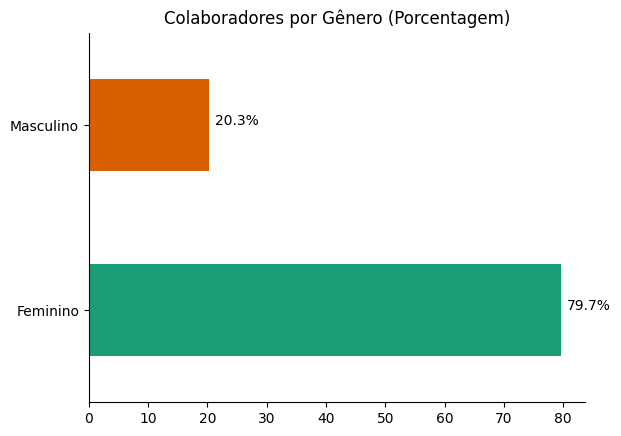

In [10]:
# @title Gênero

# Calcular as porcentagens de cada gênero
porcentagens = dados.groupby('Sexo').size() / len(dados) * 100

# Plotar o gráfico de barras
ax = porcentagens.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Remover o título do eixo y
plt.gca().set_ylabel('')

# Adicionar texto com as porcentagens ao lado de cada barra
for i, v in enumerate(porcentagens):
    ax.text(v + 1, i, f'{v:.1f}%', color='black')

# Remover as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Configurar título do gráfico
plt.title('Colaboradores por Gênero (Porcentagem)')

plt.show()


# Análises Preditivas

Nesse segundo módulo vamos trabalhar com análises preditivas e utilizar algumas técnicas de Machine Learning.

In [32]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


In [11]:
import category_encoders as ce

ModuleNotFoundError: No module named 'category_encoders'

# Correlação

In [13]:
# prompt: Atingimento BSC	Quantidade de Faltas e	Quantidade de Atrasos

import pandas as pd
df = pd.DataFrame({
    'Atingimento BSC': [0.85, 0.90, 0.75, 0.95, 0.80],
    'Quantidade de Faltas': [5, 3, 8, 1, 4],
    'Quantidade de Atrasos': [2, 1, 5, 0, 3]
})

# Calculate the correlation coefficient between 'Atingimento BSC' and 'Quantidade de Faltas'
correlation_faltas = df['Atingimento BSC'].corr(df['Quantidade de Faltas'])

# Calculate the correlation coefficient between 'Atingimento BSC' and 'Quantidade de Atrasos'
correlation_atrasos = df['Atingimento BSC'].corr(df['Quantidade de Atrasos'])

# Print the results
print(f"Correlation between Atingimento BSC and Quantidade de Faltas: {correlation_faltas:.2f}")
print(f"Correlation between Atingimento BSC and Quantidade de Atrasos: {correlation_atrasos:.2f}")


Correlation between Atingimento BSC and Quantidade de Faltas: -0.92
Correlation between Atingimento BSC and Quantidade de Atrasos: -0.99


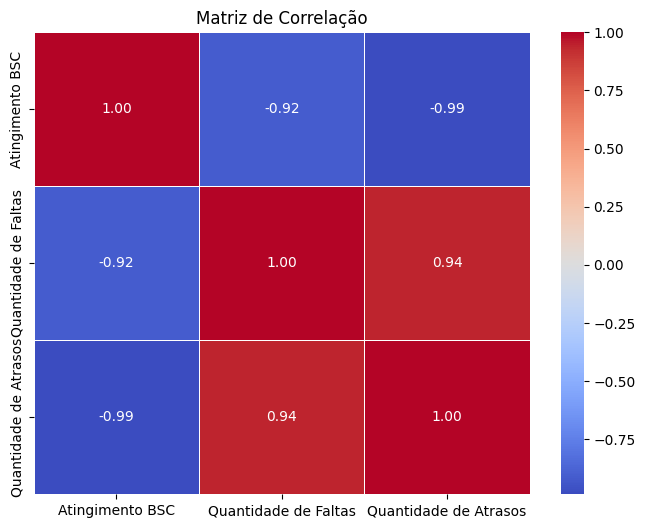

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Plotando o mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


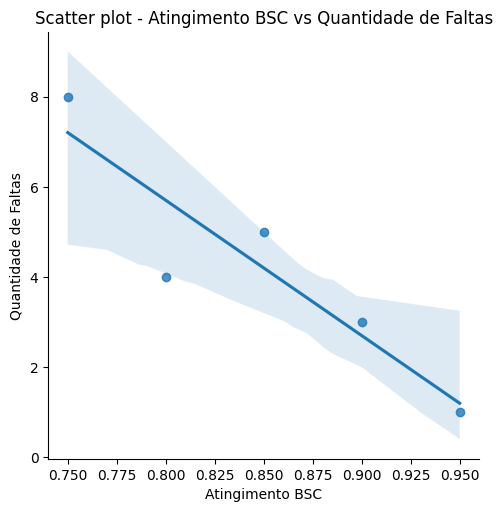

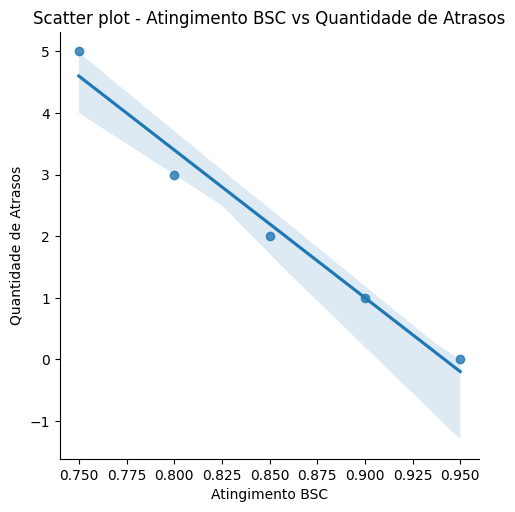

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot entre 'Atingimento BSC' e 'Quantidade de Faltas'
sns.lmplot(x='Atingimento BSC', y='Quantidade de Faltas', data=df)
plt.title('Scatter plot - Atingimento BSC vs Quantidade de Faltas')

# Scatter plot entre 'Atingimento BSC' e 'Quantidade de Atrasos'
sns.lmplot(x='Atingimento BSC', y='Quantidade de Atrasos', data=df)
plt.title('Scatter plot - Atingimento BSC vs Quantidade de Atrasos')

plt.show()
